In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
file = 'covid_data.csv'
df = pd.read_csv(file, encoding="ISO-8859-1")

In [3]:
df
del df['Province/State']
del df['Last Update']
del df['SNo']

In [4]:
# mexico_data = df.loc[df['Country/Region'] == 'Mexico',:]
# mexico_data
date = df['ObservationDate'].str.split(pat="/", expand = True)
# df['Day'] = date[1]
df['Month'] = date[0]
df['Year'] = date[2]
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Month,Year
0,01/22/2020,Mainland China,1,0,0,01,2020
1,01/22/2020,Mainland China,14,0,0,01,2020
2,01/22/2020,Mainland China,6,0,0,01,2020
3,01/22/2020,Mainland China,1,0,0,01,2020
4,01/22/2020,Mainland China,0,0,0,01,2020
...,...,...,...,...,...,...,...
205946,01/19/2021,Ukraine,62492,738,39168,01,2021
205947,01/19/2021,Netherlands,13031,149,0,01,2021
205948,01/19/2021,Mainland China,1316,1,1298,01,2021
205949,01/19/2021,Ukraine,42758,707,37834,01,2021


In [41]:
m = (df['Country/Region'] == 'Mexico') | (df['Country/Region'] == 'US') | (df['Country/Region'] == 'Canada')
clean_df = df.loc[m,:]
clean_df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Month,Year
31,01/22/2020,US,1,0,0,01,2020
69,01/23/2020,US,1,0,0,01,2020
81,01/23/2020,Mexico,0,0,0,01,2020
117,01/24/2020,US,1,0,0,01,2020
118,01/24/2020,US,1,0,0,01,2020
...,...,...,...,...,...,...,...
205932,01/19/2021,US,571268,5973,0,01,2021
205933,01/19/2021,US,49922,550,0,01,2021
205940,01/19/2021,Mexico,28558,2566,0,01,2021
205941,01/19/2021,Canada,70,1,69,01,2021


In [42]:
clean_df2 = clean_df.drop(['ObservationDate'],axis=1)
# clean_df3 = clean_df2.groupby(['Country/Region','Month'])
# clean_df3.head()

C:\Users\guzma\Anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


[Text(0, -50000.0, '-50,000'),
 Text(0, 0.0, '0'),
 Text(0, 50000.0, '50,000'),
 Text(0, 100000.0, '100,000'),
 Text(0, 150000.0, '150,000'),
 Text(0, 200000.0, '200,000'),
 Text(0, 250000.0, '250,000'),
 Text(0, 300000.0, '300,000'),
 Text(0, 350000.0, '350,000')]

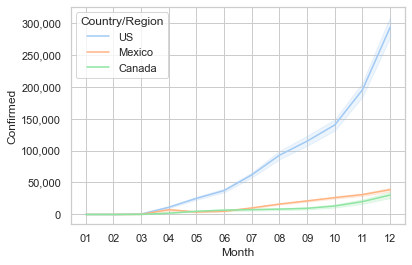

In [50]:
sns.set_theme(style="whitegrid")
df_final = clean_df2[['Month','Year','Country/Region','Confirmed']]
covid_2020 = df_final.query("Year == '2020'")
palette = sns.color_palette("pastel", 3)
g = sns.lineplot(data=covid_2020, x="Month", y="Confirmed", hue="Country/Region",palette=palette)
ylabels = ['{:,.0f}'.format(y)  for y in g.get_yticks()]
g.set_yticklabels(ylabels)
